This is from page 31


In [1]:
import numpy as np
import spacepy.plot as spp

import pymc

%matplotlib inline



This unreleased version of SpacePy is not supported by the SpacePy team.


/Users/balarsen/miniconda3/envs/python3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
n = 251527 + 241945
p = pymc.Uniform('p', 0, 1, observed=True, value=241945/n)


g_prob = pymc.Binomial('g_prob', n=n, p=p)

In [3]:
model = pymc.MCMC((p,g_prob))

In [4]:
model.sample(100000, burn=100, burn_till_tuned=True)

 [-----------------100%-----------------] 104900 of 104900 complete in 6.0 sec

Plotting g_prob


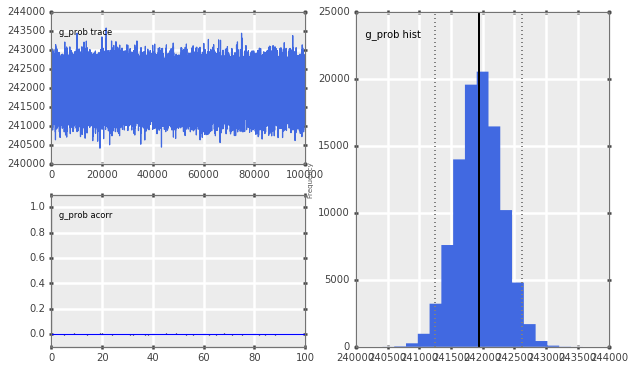

In [5]:
pymc.Matplot.plot(model)

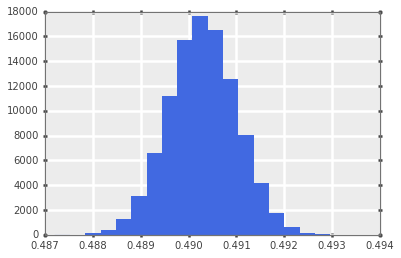

In [6]:
a = spp.plt.hist(model.trace('g_prob')[:]/n, 20)


In [7]:
print(model.summary())


g_prob:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	241945.271       351.402          1.152        [ 241251.  242626.]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	241256.0         241709.0        241945.0       242183.0      242633.0
	
None


# Run this again with a different prior

In [8]:
n = 251527 + 241945
p = pymc.Normal('p', 0.5, 0.2, observed=True, value=241945/n)


g_prob = pymc.Binomial('g_prob', n=n, p=p)

In [9]:
model = pymc.MCMC((p,g_prob))

In [10]:
model.sample(100000, burn=100, burn_till_tuned=True)

 [-----------------100%-----------------] 104900 of 104900 complete in 6.0 sec

Plotting g_prob


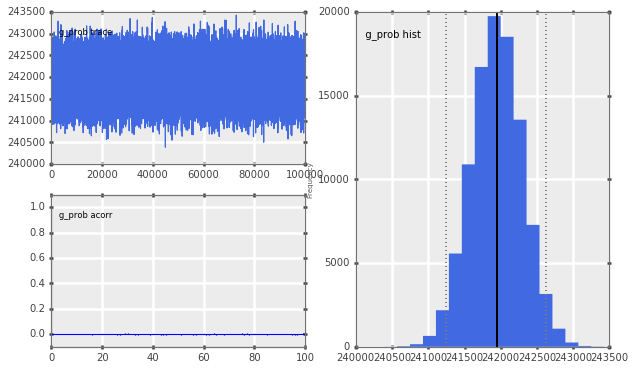

In [11]:
pymc.Matplot.plot(model)

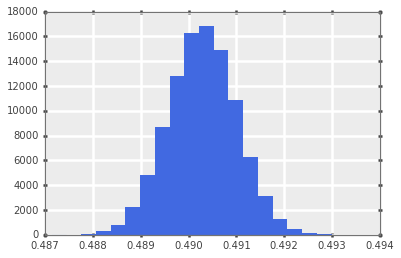

In [12]:
a = spp.plt.hist(model.trace('g_prob')[:]/n, 20)


In [13]:
print(model.summary())


g_prob:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	241943.78        351.169          1.071        [ 241250.  242622.]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	241257.0         241707.0        241945.0       242182.0      242630.0
	
None


# This can be done in another way, page 38 for sex ratio


In [47]:
n = 251527 + 241945
p = pymc.Normal('p', 0.5, 0.2, observed=True, value=241945/n)

g_prob = pymc.Binomial('g_prob', n=n, p=p)

@pymc.deterministic(plot=True)
def sex_ratio(g_prob=g_prob, n=n):
    return ((1-g_prob/n)/(g_prob/n))

from scipy.special import logit
@pymc.deterministic(plot=True)
def sex_ratio_logit(g_prob=g_prob, n=n):
    return logit(g_prob/n)



In [48]:
model = pymc.MCMC((p,g_prob, sex_ratio, sex_ratio_logit))

In [49]:
model.sample(100000, burn=100, burn_till_tuned=True)

 [-----------------100%-----------------] 104900 of 104900 complete in 8.3 sec

Plotting g_prob
Plotting sex_ratio
Plotting sex_ratio_logit


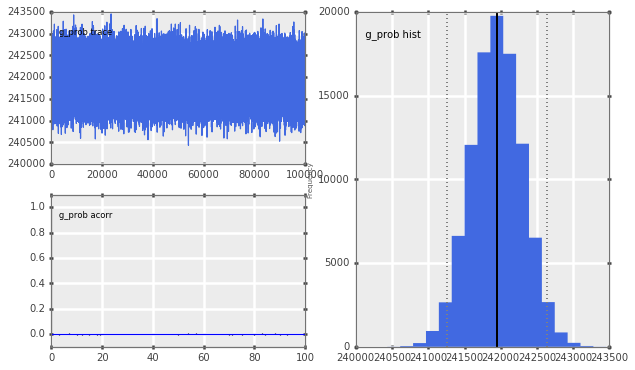

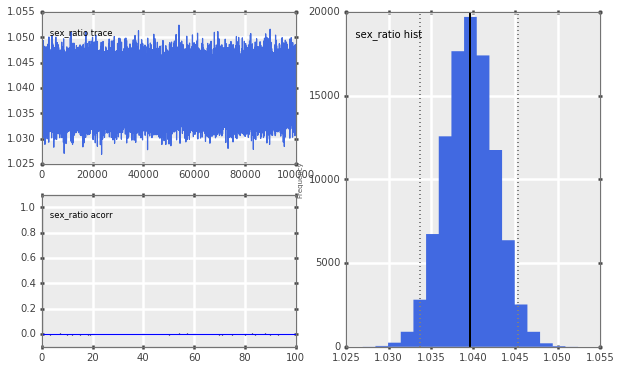

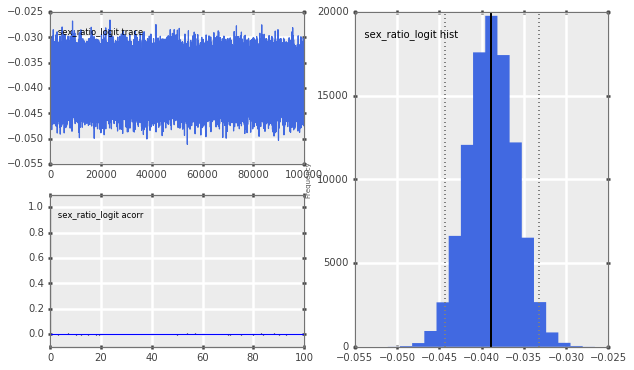

In [50]:
pymc.Matplot.plot(model)

In [51]:
print(model.summary())


g_prob:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	241944.649       353.317          1.158        [ 241262.  242643.]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	241252.0         241707.0        241945.0       242184.0      242635.0
	

sex_ratio:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	1.04             0.003            0.0              [ 1.034  1.045]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	1.034            1.038           1.04           1.042         1.045
	

sex_ratio_logit:
 
	Mean             SD               MC Error        95% HPD interval
	---